In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.metrics import r2_score

In [119]:
# Set up the plotting style and inline display
%matplotlib inline
sns.set()
sns.set_theme(style="white")

In [120]:
# Load data from Excel files
df_test_adaboost = pd.read_excel('./predicted_adaboost_model.xlsx', sheet_name='testing')

df_test_gboost = pd.read_excel('./predicted_gradient_boosting_model.xlsx', sheet_name='testing')

df_test_xgboost = pd.read_excel('./predicted_xgboost_model.xlsx', sheet_name='testing')

df_test_ann_y_test = pd.read_csv('./ann files/y_test.csv')
df_test_ann_y_pred = pd.read_csv('./ann files/pred_2.csv')

df_test_stack_b = pd.read_excel('./stack b/grid_search_stacking_train_test_data.xlsx', sheet_name='testing')

In [121]:
# Calculate R² scores
r2_test_adaboost = r2_score(df_test_adaboost['y_test'], df_test_adaboost['y_test_pred'])

r2_test_gboost = r2_score(df_test_gboost['y_test'], df_test_gboost['y_test_pred'])

r2_test_xgboost = r2_score(df_test_xgboost['y_test'], df_test_xgboost['y_test_pred'])

r2_test_ann = r2_score(df_test_ann_y_test, df_test_ann_y_pred)

r2_test_stack_b = r2_score(df_test_stack_b['y_test'], df_test_stack_b['y_test_pred'])

In [182]:
# Set up font sizes for plots
SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 17
MARKER_SIZE = 35


plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['mathtext.bf'] = 'Times New Roman'
plt.rcParams["font.family"] = 'Times New Roman'

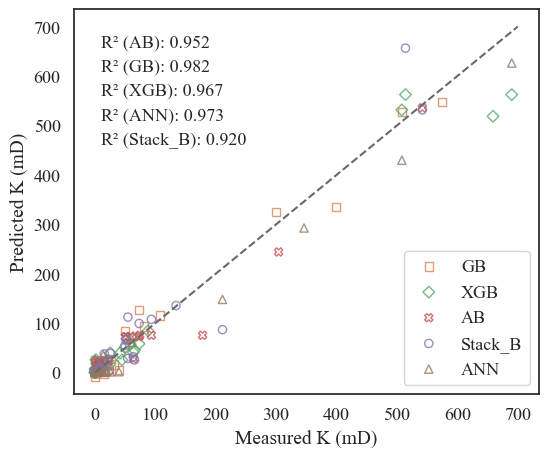

In [186]:
plt.figure(figsize=(6, 5))

xpoints = np.array([0, 700])
ypoints = np.array([0, 700])
plt.plot(xpoints, ypoints, linestyle = '--', color="dimgray")

sns.regplot(
    x=df_test_gboost['y_test'],
    y=df_test_gboost['y_test_pred'],
    scatter_kws={"color": "C1", "s": MARKER_SIZE, "facecolors": "none"},
    label="GB",
    ci=None,
    fit_reg=False,
    marker='s'
)
sns.regplot(
    x=df_test_xgboost['y_test'],
    y=df_test_xgboost['y_test_pred'],
    scatter_kws={"color": "C2", "s": MARKER_SIZE, "facecolors": "none"},
    label="XGB",
    ci=None,
    fit_reg=False
    ,marker='D'
)
sns.regplot(
    x=df_test_adaboost['y_test'],
    y=df_test_adaboost['y_test_pred'],
    scatter_kws={"color": "C3", "s": MARKER_SIZE, "facecolors": "none"},
    label="AB",
    ci=None,
    fit_reg=False
    ,marker='X'
)
sns.regplot(
    x=df_test_stack_b['y_test'],
    y=df_test_stack_b['y_test_pred'],
    scatter_kws={"color": "C4", "s": MARKER_SIZE, "facecolors": "none"},
    label="Stack_B",
    ci=None,
    fit_reg=False
    ,marker='o'
)
sns.regplot(
    x=df_test_ann_y_test,
    y=df_test_ann_y_pred,
    scatter_kws={"color": "C5", "s": MARKER_SIZE, "facecolors": "none"},
    label="ANN",
    ci=None,
    fit_reg=False
    ,marker='^'
)

r2_text = f"""
R² (AB): {r2_test_adaboost:.3f}
R² (GB): {r2_test_gboost:.3f}
R² (XGB): {r2_test_xgboost:.3f}
R² (ANN): {r2_test_ann:.3f}
R² (Stack_B): {r2_test_stack_b:.3f}
"""
plt.text(10, 570, r2_text, fontsize=13, verticalalignment='center', horizontalalignment='left', linespacing=1.7)


plt.legend(loc='lower right')


plt.xlabel("Measured K (mD)", fontsize=14)
plt.ylabel("Predicted K (mD)", fontsize=14)
plt.savefig("kahini.png", dpi=400)